<a href="https://colab.research.google.com/github/Alaa-Hesham11/classification_project-/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from google.colab import files

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


In [5]:
print("📂 Step 1: Please upload your CSV file")
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])


📂 Step 1: Please upload your CSV file


Saving salary.csv to salary.csv


In [6]:
print("\n📊 DATASET OVERVIEW")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(df.columns.tolist())

print("\nℹ️ DATA INFO")
df.info()

print("\n❓ MISSING VALUES")
print(df.isnull().sum())



📊 DATASET OVERVIEW
Rows: 32561
Columns: 15
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

ℹ️ DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-

In [8]:
print("\n🔎 Unique values BEFORE Label Encoding:\n")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"📌 Column: {col}")
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Unique values: {df[col].unique()}")
        print("-"*50)



🔎 Unique values BEFORE Label Encoding:

📌 Column: workclass
Number of unique values: 9
Unique values: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------
📌 Column: education
Number of unique values: 16
Unique values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------
📌 Column: marital-status
Number of unique values: 7
Unique values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
--------------------------------------------------
📌 Column: occupation
Number of unique values: 15
Unique values: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-re

In [9]:
print("\n🛠️ Step 2: Preprocessing...")

# Strip column names and replace '?' with NaN
df.columns = df.columns.str.strip()
df.replace("?", np.nan, inplace=True)

# Define target column
target = "salary"

# Handle missing values & Label Encoding
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    else:
        df[col] = df[col].fillna(df[col].median())



🛠️ Step 2: Preprocessing...


In [10]:
print("\n🔎 Unique values AFTER Label Encoding:\n")
for col in df.columns:
    if df[col].dtype == "int64" and col != target:
        print(f"📌 Column: {col}")
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Unique values: {df[col].unique()[:20]} ...")
        print("-"*50)

print("✅ Missing values handled & categorical variables encoded.")

print("\n🎯 Target Distribution:")
print(df[target].value_counts())



🔎 Unique values AFTER Label Encoding:

📌 Column: age
Number of unique values: 73
Unique values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59] ...
--------------------------------------------------
📌 Column: workclass
Number of unique values: 9
Unique values: [7 6 4 1 2 0 5 8 3] ...
--------------------------------------------------
📌 Column: fnlwgt
Number of unique values: 21648
Unique values: [ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449
 280464 141297 122272 205019 121772 245487 176756 186824  28887 292175] ...
--------------------------------------------------
📌 Column: education
Number of unique values: 16
Unique values: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2] ...
--------------------------------------------------
📌 Column: education-num
Number of unique values: 16
Unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] ...
--------------------------------------------------
📌 Column: marital-status
Number of unique values

In [11]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Feature scaling completed.")


✅ Feature scaling completed.


In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": LinearSVC(max_iter=2000)
}


In [14]:
results = []

print("\n🚀 Training Models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1
    })

    print(f"✔️ {name} done.")

results_df = pd.DataFrame(results).sort_values(
    by="F1-Score", ascending=False
)

print("\n📊 MODEL PERFORMANCE")
print(results_df.to_string(index=False))



🚀 Training Models...
✔️ Logistic Regression done.
✔️ Random Forest done.
✔️ KNN done.
✔️ Decision Tree done.
✔️ Naive Bayes done.
✔️ Linear SVM done.

📊 MODEL PERFORMANCE
              Model  Accuracy  F1-Score
      Random Forest  0.861354  0.857360
                KNN  0.835253  0.831784
      Decision Tree  0.813143  0.814380
Logistic Regression  0.824658  0.810478
         Linear SVM  0.826040  0.808098
        Naive Bayes  0.809304  0.785064


In [15]:
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100], "max_depth": [None, 5, 10]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "Decision Tree": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5]},
    "Linear SVM": {"C": [0.01, 0.1, 1, 10]},
    # Naive Bayes usually doesn't require tuning
}

tuned_results = []

print("\n🔧 HYPERPARAMETER TUNING (All Models)")

for name, model in models.items():
    if name in param_grids:
        grid = GridSearchCV(
            model,
            param_grids[name],
            cv=3,
            scoring="f1_weighted"
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        tuned_preds = best_model.predict(X_test)

        tuned_acc = accuracy_score(y_test, tuned_preds)
        tuned_f1 = f1_score(y_test, tuned_preds, average="weighted")

        tuned_results.append({
            "Model": name,
            "Tuned Accuracy": tuned_acc,
            "Tuned F1-Score": tuned_f1,
            "Best Params": grid.best_params_
        })

        print(f"✔️ {name} tuning done. Best Params: {grid.best_params_}")
    else:
        # For models without a param grid
        tuned_preds = model.predict(X_test)
        tuned_acc = accuracy_score(y_test, tuned_preds)
        tuned_f1 = f1_score(y_test, tuned_preds, average="weighted")
        tuned_results.append({
            "Model": name,
            "Tuned Accuracy": tuned_acc,
            "Tuned F1-Score": tuned_f1,
            "Best Params": "N/A"
        })

tuned_results_df = pd.DataFrame(tuned_results).sort_values(
    by="Tuned F1-Score", ascending=False
)

print("\n📊 TUNED MODEL PERFORMANCE")
print(tuned_results_df.to_string(index=False))



🔧 HYPERPARAMETER TUNING (All Models)
✔️ Logistic Regression tuning done. Best Params: {'C': 1}
✔️ Random Forest tuning done. Best Params: {'max_depth': None, 'n_estimators': 100}
✔️ KNN tuning done. Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
✔️ Decision Tree tuning done. Best Params: {'max_depth': 10, 'min_samples_split': 5}
✔️ Linear SVM tuning done. Best Params: {'C': 0.1}

📊 TUNED MODEL PERFORMANCE
              Model  Tuned Accuracy  Tuned F1-Score                               Best Params
      Random Forest        0.860894        0.857171  {'max_depth': None, 'n_estimators': 100}
      Decision Tree        0.856287        0.849198 {'max_depth': 10, 'min_samples_split': 5}
                KNN        0.840626        0.836405  {'n_neighbors': 7, 'weights': 'uniform'}
Logistic Regression        0.824658        0.810478                                  {'C': 1}
         Linear SVM        0.826040        0.808098                                {'C': 0.1}
        Naive Bayes

In [16]:
best_model = results_df.iloc[0]["Model"]

print("\n" + "*"*40)
print(f"🏆 BEST MODEL (Before Tuning): {best_model}")
print("*"*40)



****************************************
🏆 BEST MODEL (Before Tuning): Random Forest
****************************************


/tmp/ipython-input-1118574595.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")


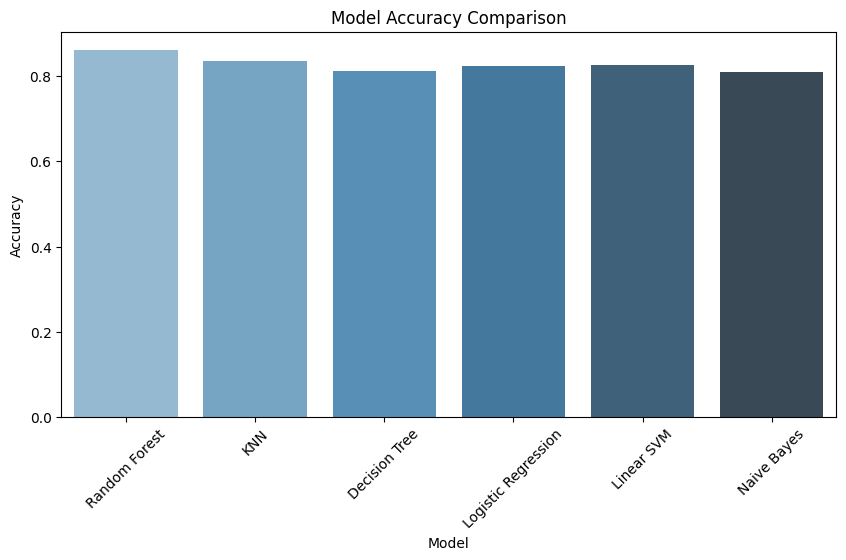

/tmp/ipython-input-1118574595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_df, palette="Greens_d")


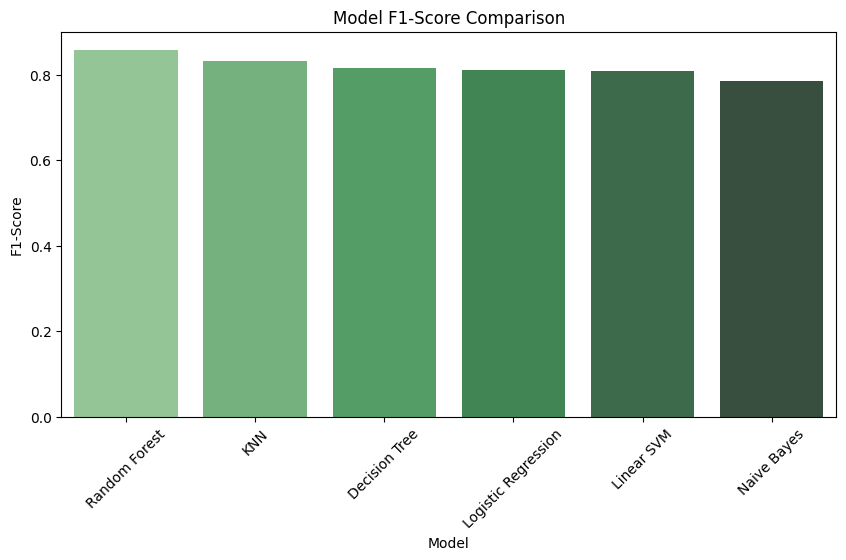

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Compare Models Performance
# =====================================================
plt.figure(figsize=(10,5))

# Accuracy
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# F1-Score
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="Greens_d")
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()


🏆 Best Model: Random Forest

--- Classification Report (Per Class Only) ---
<=50K: precision=0.89, recall=0.93, f1-score=0.91, support=4942.0
>50K: precision=0.75, recall=0.64, f1-score=0.69, support=1571.0


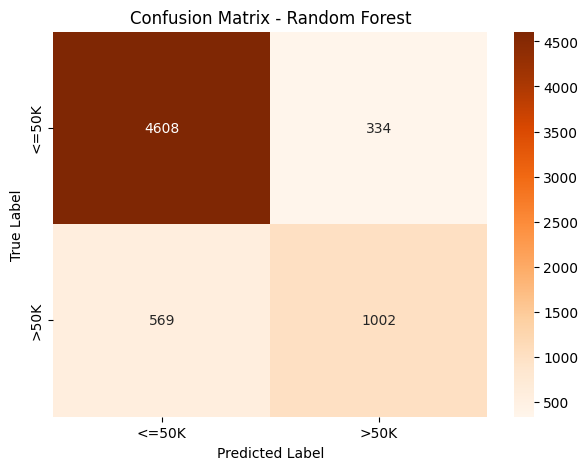

In [18]:
# =========================================
# 📊 Evaluation for BEST MODEL only
# =========================================

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Get best model name (highest F1-score)
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"🏆 Best Model: {best_model_name}")

# 2️⃣ Retrain best model on training data
best_model.fit(X_train, y_train)

# 3️⃣ Predict on test data
y_pred = best_model.predict(X_test)

# 4️⃣ Classification Report (only per class, no macro/weighted avg)
report_dict = classification_report(
    y_test,
    y_pred,
    target_names=["<=50K", ">50K"],
    output_dict=True
)

print("\n--- Classification Report (Per Class Only) ---")
for cls in ["<=50K", ">50K"]:
    precision = report_dict[cls]["precision"]
    recall = report_dict[cls]["recall"]
    f1 = report_dict[cls]["f1-score"]
    support = report_dict[cls]["support"]
    print(f"{cls}: precision={precision:.2f}, recall={recall:.2f}, f1-score={f1:.2f}, support={support}")

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"]
)

plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
